In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:

import os
os.chdir('/content/drive/My Drive/ML/FinalProject')
#os.chdir('dataset')
!ls

 dataset  'Two Sigma Revised.pptx'   vef_2sigma.ipynb


In [0]:
#!gunzip market_train_uni1_v1.csv.gz

In [0]:
#!gunzip news_market_train_uni1_v1.csv.gz

In [31]:
!ls dataset

market_train_uni1_v1.csv  news_market_train_uni1_v1.csv


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
market_dt = pd.read_csv('dataset/market_train_uni1_v1.csv')

In [0]:
news_dt = pd.read_csv('dataset/news_market_train_uni1_v1.csv')

In [7]:
market_dt.shape

(2423150, 21)

In [8]:
news_dt.shape

(6260063, 35)

In [0]:
market_dt.head(4)

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,close_open_diff,volume_money_mean,binary_returnsNextMktres10,cluster_open_close,cluster_volume,cluster_prev_returns
0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672,1.000622,8.389004e+07,True,6,0,0
1,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,1164800.0,37.51,37.99,-0.011594,0.025648,NaN,NaN,0.014332,0.045405,NaN,NaN,0.024433,0.987365,4.397120e+07,True,6,0,0
2,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,23747329.0,84.74,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425,0.982721,2.030040e+09,False,8,3,0
3,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,1208600.0,18.02,18.01,0.011791,0.025043,NaN,NaN,0.012929,0.020397,NaN,NaN,-0.017994,1.000555,2.177293e+07,False,1,0,0


In [0]:
market_dt.columns

Index(['time', 'assetCode', 'assetName', 'volume', 'close', 'open',
       'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10', 'close_open_diff', 'volume_money_mean',
       'binary_returnsNextMktres10', 'cluster_open_close', 'cluster_volume',
       'cluster_prev_returns'],
      dtype='object')

In [0]:
print ("There are",len(market_dt.assetCode.unique()), "unique assetCode in market dataset")

There are 2466 unique assetCode in market dataset


In [0]:
print (market_dt.groupby('assetCode').size().sort_values().tail(100))

assetCode
CNQ.N     2498
SYMC.O    2498
SYK.N     2498
COF.N     2498
COG.N     2498
          ... 
EIX.N     2498
EL.N      2498
EMR.N     2498
SBUX.O    2498
A.N       2498
Length: 100, dtype: int64


In [0]:
missing_cnts = market_dt.isnull().sum(axis = 0)
missing_pct = missing_cnts / market_dt.shape[0]
missing_pct.sort_values(ascending = False).head()

returnsOpenPrevMktres10     0.006997
returnsClosePrevMktres10    0.006979
returnsOpenPrevMktres1      0.000905
returnsClosePrevMktres1     0.000901
cluster_prev_returns        0.000000
dtype: float64

In [0]:
market_dt.describe()


,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,close_open_diff,volume_money_mean,cluster_open_close,cluster_volume,cluster_prev_returns
count,2.423150e+06,2.423150e+06,2.423150e+06,2.423150e+06,2.423150e+06,2.420966e+06,2.420958e+06,2.423150e+06,2.423150e+06,2.406239e+06,2.406195e+06,2.423150e+06,2.423150e+06,2.423150e+06,2.423150e+06,2.423150e+06,2.423150e+06
mean,3.932176e+06,4.454807e+01,4.454604e+01,4.823969e-04,1.154115e-02,1.363257e-04,1.182194e-02,4.753781e-03,1.588879e-02,1.853962e-03,2.292558e-02,2.074374e-02,1.011140e+00,1.402837e+08,3.860483e+00,1.343613e+00,1.774550e-05
std,9.655649e+06,4.467067e+01,4.472813e+01,2.813646e-02,8.267287e+00,2.245747e-02,8.166572e+00,8.129790e-02,8.388063e+00,6.744348e-02,8.785769e+00,8.714287e+00,8.213667e+00,3.312173e+08,2.611245e+00,2.087680e+00,9.721358e-03
min,0.000000e+00,7.000000e-02,1.000000e-02,-9.044147e-01,-9.998881e-01,-1.235622e+00,-3.963545e+02,-9.377910e-01,-9.998904e-01,-2.266069e+00,-2.400056e+02,-2.400056e+02,8.059332e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.985082e+05,2.127000e+01,2.127000e+01,-1.034355e-02,-1.051457e-02,-7.980124e-03,-9.432923e-03,-3.175127e-02,-3.169572e-02,-2.717614e-02,-2.749299e-02,-2.735446e-02,9.907367e-01,2.903934e+07,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.746062e+06,3.515000e+01,3.514000e+01,3.742515e-04,4.248088e-04,-1.011449e-04,3.185201e-05,5.174249e-03,5.173814e-03,1.084535e-03,1.391841e-03,1.200522e-03,1.000191e+00,6.275067e+07,3.000000e+00,0.000000e+00,0.000000e+00
75%,3.765097e+06,5.547000e+01,5.547000e+01,1.115573e-02,1.128472e-02,7.866592e-03,9.497455e-03,4.106431e-02,4.108463e-02,2.918390e-02,3.034283e-02,2.957376e-02,1.009583e+00,1.398476e+08,6.000000e+00,4.000000e+00,0.000000e+00
max,1.226791e+09,1.578130e+03,3.288114e+03,9.587479e+00,9.209000e+03,9.482848e+00,8.989207e+03,8.503464e+00,9.382000e+03,9.573360e+00,9.761338e+03,9.761338e+03,9.120000e+03,3.102226e+10,8.000000e+00,8.000000e+00,8.000000e+00


In [0]:
ind = np.arange(market_dt.shape[1])
width = 0.6
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, missing_pct.values, color='g')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(missing_cnts.index, rotation='horizontal')
ax.set_xlabel("Percentage of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

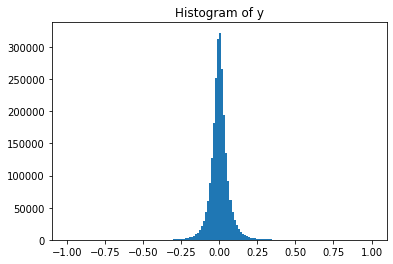

In [0]:
#plt.figure(figsize = (8, 6))
%matplotlib inline
plt.hist(market_dt.returnsOpenNextMktres10.clip(-1,1), density=False ,bins = 150)
plt.title("Histogram of y")
plt.show()

In [0]:
print (market_dt.returnsOpenNextMktres10.describe())

count    2.423150e+06
mean     2.074374e-02
std      8.714287e+00
min     -2.400056e+02
25%     -2.735446e-02
50%      1.200522e-03
75%      2.957376e-02
max      9.761338e+03
Name: returnsOpenNextMktres10, dtype: float64


In [0]:
max(market_dt.returnsOpenNextMktres10)

9761.338266772531

In [0]:
min(market_dt.returnsOpenNextMktres10)

-240.0056236169524

In [0]:
market_dt.returnsOpenNextMktres10.head()

0    0.034672
1    0.024433
2   -0.007425
3   -0.017994
4    0.058680
Name: returnsOpenNextMktres10, dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



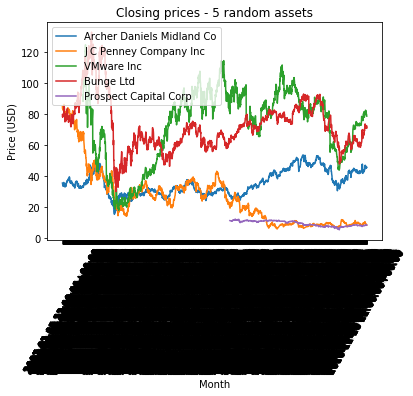

In [0]:
randoms = market_dt.sample(5, random_state=33)
data = []

for asset in randoms['assetName']:
    asset_df = market_dt[(market_dt['assetName'] == asset)]
    asset_df['date'] = pd.to_datetime(asset_df['time']).dt.strftime(date_format='%Y-%m-%d').values
    asset_df = asset_df.set_index('time')
    
    plt.plot(asset_df['close'], label=asset)

plt.title('Closing prices - 5 random assets')
plt.xlabel('Month')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.xticks(rotation=60)
plt.rcParams["figure.figsize"] = (16,8)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



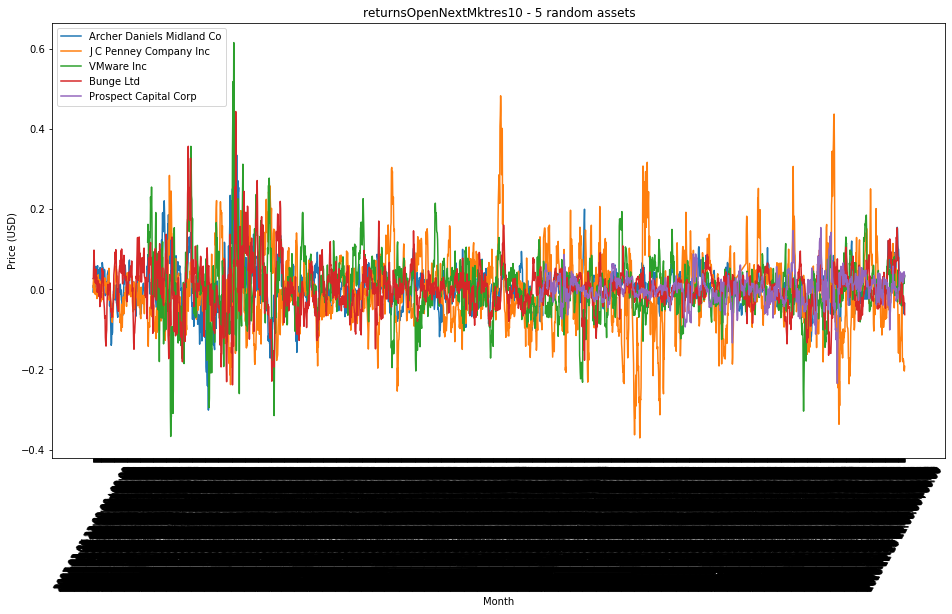

In [0]:
data = []

for asset in randoms['assetName']:
    asset_df = market_dt[(market_dt['assetName'] == asset)]
    asset_df['date'] = pd.to_datetime(asset_df['time']).dt.strftime(date_format='%Y-%m-%d').values
    asset_df = asset_df.set_index('time')
    
    plt.plot(asset_df['returnsOpenNextMktres10'], label=asset)

plt.title('returnsOpenNextMktres10 - 5 random assets')
plt.xlabel('Month')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.xticks(rotation=60)
plt.show()


In [0]:
q1_df = market_dt.groupby('time')['returnsOpenNextMktres10'].quantile(0.01).reset_index()
q99_df = market_dt.groupby('time')['returnsOpenNextMktres10'].quantile(0.99).reset_index()

In [0]:
print(f'Min q1: {q1_df["returnsOpenNextMktres10"].min()}')
print(f'Max q99: {q99_df["returnsOpenNextMktres10"].max()}')

Min q1: -0.45505646556564316
Max q99: 0.82022352576666


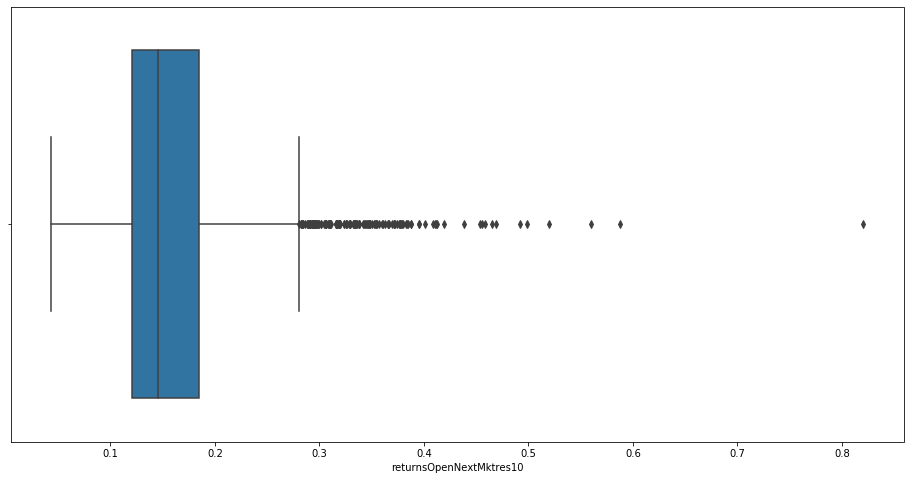

In [0]:
ax = sns.boxplot(x=q99_df['returnsOpenNextMktres10'])

In [0]:
news_dt.head(4)

,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,audiences,bodySize,companyCount,headlineTag,marketCommentary,sentenceCount,wordCount,assetCodes,assetName,firstMentionSentence,relevance,sentimentClass,sentimentNegative,sentimentNeutral,sentimentPositive,sentimentWordCount,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
0,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,e58c6279551b85cf,China's Daqing pumps 43.41 mln tonnes of oil i...,3,1,RTRS,"{'ENR', 'ASIA', 'CN', 'NGS', 'EMRG', 'RTRS', '...","{'Z', 'O', 'OIL'}",1438,1,NaN,False,11,275,"{'0857.HK', '0857.F', '0857.DE', 'PTR.N'}",PetroChina Co Ltd,6,0.235702,-1,0.500739,0.419327,0.079934,73,0,0,0,0,0,0,0,3,6,7
1,2007-01-01 07:03:35+00:00,2007-01-01 07:03:34+00:00,2007-01-01 07:03:34+00:00,5a31c4327427f63f,"FEATURE-In kidnapping, finesse works best",3,1,RTRS,"{'FEA', 'CA', 'LATAM', 'MX', 'INS', 'ASIA', 'I...","{'PGE', 'PCO', 'G', 'ESN', 'MD', 'PCU', 'DNP',...",4413,1,FEATURE,False,55,907,{'STA.N'},Travelers Companies Inc,8,0.447214,-1,0.600082,0.345853,0.054064,62,1,1,1,1,1,1,1,3,3,3
2,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'FUND', 'FIN', 'CA', 'SFWR', 'INS', 'PUB', 'B...","{'T', 'DNP', 'PSC', 'U', 'D', 'M', 'RNP', 'PTD...",1776,6,PRESS DIGEST,False,14,325,{'XMSR.O'},XM Satellite Radio Holdings Inc,11,0.149071,-1,0.699274,0.209360,0.091367,102,0,0,0,0,0,0,0,0,0,0
3,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'FUND', 'FIN', 'CA', 'SFWR', 'INS', 'PUB', 'B...","{'T', 'DNP', 'PSC', 'U', 'D', 'M', 'RNP', 'PTD...",1776,6,PRESS DIGEST,False,14,325,"{'DIS.DE', 'DIS.F', 'DIS.N'}",Walt Disney Co,5,0.149071,0,0.152658,0.615878,0.231464,46,0,0,0,0,0,0,0,2,8,8


In [0]:
news_dt.columns

Index(['time', 'sourceTimestamp', 'firstCreated', 'sourceId', 'headline',
       'urgency', 'takeSequence', 'provider', 'subjects', 'audiences',
       'bodySize', 'companyCount', 'headlineTag', 'marketCommentary',
       'sentenceCount', 'wordCount', 'assetCodes', 'assetName',
       'firstMentionSentence', 'relevance', 'sentimentClass',
       'sentimentNegative', 'sentimentNeutral', 'sentimentPositive',
       'sentimentWordCount', 'noveltyCount12H', 'noveltyCount24H',
       'noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D', 'volumeCounts12H',
       'volumeCounts24H', 'volumeCounts3D', 'volumeCounts5D',
       'volumeCounts7D'],
      dtype='object')

In [0]:
print ("There are",len(news_dt.assetCodes.unique()), "unique assetCode in news dataset")

There are 2939 unique assetCode in news dataset


In [0]:
news_dt.assetCodes.unique()

array(["{'0857.HK', '0857.F', '0857.DE', 'PTR.N'}", "{'STA.N'}",
       "{'XMSR.O'}", ..., "{'UAA.N', 'UA.N'}", "{'TAL.N'}",
       "{'AMXL.MX', 'AMX.N', 'AMXA.MX'}"], dtype=object)

In [9]:
news_dt['urgency'].value_counts().index

Int64Index([3, 1, 2], dtype='int64')

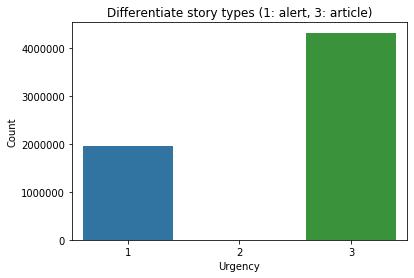

In [10]:
_ = sns.barplot(news_dt['urgency'].value_counts().index, news_dt['urgency'].value_counts())
_ = plt.xlabel('Urgency')
_ = plt.ylabel('Count')
_ = plt.title('Differentiate story types (1: alert, 3: article)')

In [0]:
grouped_3 = news_dt[news_dt['urgency'] == 3].groupby(news_dt[news_dt['urgency'] == 3].index)
grouped_1 = news_dt[news_dt['urgency'] == 1].groupby(news_dt[news_dt['urgency'] == 1].index)


In [19]:
xx = grouped_3['urgency'].agg(np.sum)
xx

0          3
1          3
2          3
3          3
4          3
          ..
6260054    3
6260055    3
6260056    3
6260057    3
6260062    3
Name: urgency, Length: 4312771, dtype: int64

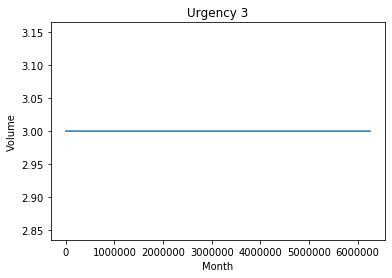

In [20]:
plt.plot(grouped_3['urgency'].agg(np.sum), label='3')

plt.title('Urgency 3')
plt.xlabel('Month')
plt.ylabel('Volume')
#plt.legend(loc='upper left')
#plt.xticks(rotation=60)
plt.show()


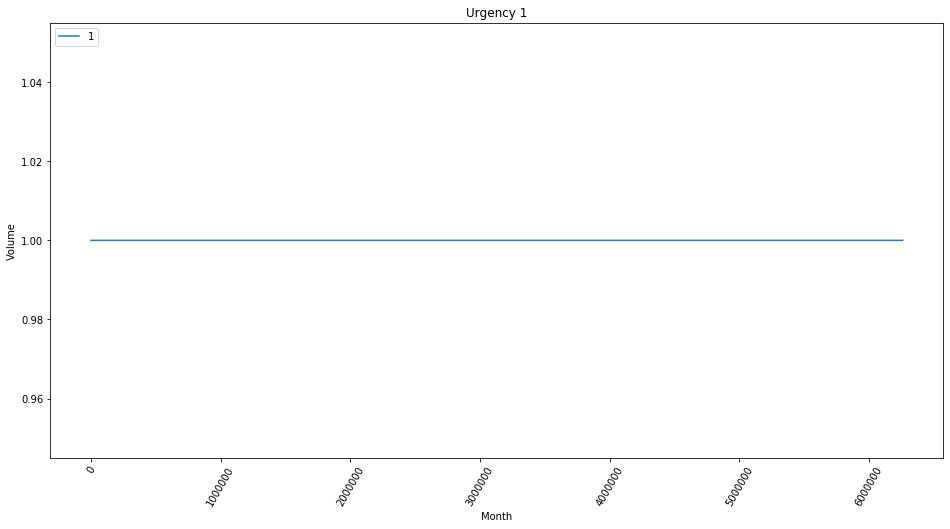

In [37]:
plt.plot(grouped_1['urgency'].agg(np.sum), label='1')

plt.title('Urgency 1')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.legend(loc='upper left')
plt.xticks(rotation=60)
plt.show()

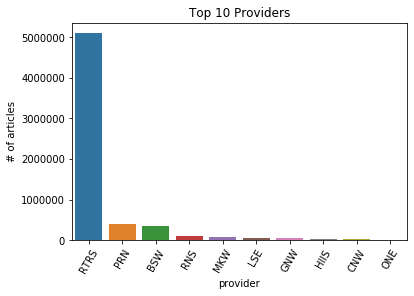

In [21]:
_ = sns.barplot(np.array(news_dt['provider'].value_counts().index[0:10]), news_dt['provider'].value_counts()[0:10])
_ = plt.title('Top 10 Providers')
_ = plt.xlabel('provider')
_ = plt.ylabel('# of articles')
_ = plt.xticks(rotation=60)

In [23]:
grouped_news = news_dt.groupby('assetName')

grouped_news['sentimentClass'].agg(np.sum).sort_values(ascending=True)[0:20]


assetName
Citigroup Inc                           -12798
Bank of America Corp                    -12291
JPMorgan Chase & Co                     -11927
BP PLC                                   -9674
Goldman Sachs Group Inc                  -9023
Latam Airlines Group SA                  -5457
American International Group Inc         -5136
Federal National Mortgage Association    -5026
Morgan Stanley                           -4987
Royal Bank of Scotland Group PLC         -4804
Toyota Motor Corp                        -4712
HSBC Holdings PLC                        -4576
Exxon Mobil Corp                         -4468
Transocean Ltd                           -3966
Credit Suisse Group AG                   -3945
Apple Inc                                -3932
Chevron Corp                             -3592
Deutsche Bank AG                         -3488
Petroleo Brasileiro SA Petrobras         -3363
Wells Fargo & Co                         -3175
Name: sentimentClass, dtype: int64

In [24]:
grouped_news['sentimentClass'].agg(np.sum).sort_values(ascending=False)[0:20]

assetName
General Electric Co                     8566
Verizon Communications Inc              8349
AT&T Inc                                7373
Ball Corp                               6558
Barclays PLC                            6258
Rio Tinto PLC                           4959
Aviva PLC                               4653
Bank of Montreal                        4609
Royal Dutch Shell PLC                   4479
International Business Machines Corp    4468
Shire PLC                               4214
Invesco Ltd                             4020
BHP Billiton PLC                        3386
Equinix Inc                             3303
Comcast Corp                            3068
Blackstone Group LP                     2723
Vodafone Group PLC                      2707
Amazon.com Inc                          2667
Microsoft Corp                          2649
Nasdaq Inc                              2587
Name: sentimentClass, dtype: int64